In [1]:
# usual imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv(r"../../Resources/Stacked_ETF_Files/ticker_data_stacked1.csv")

In [3]:
df.shape

(10549, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     10549 non-null  object 
 1   Ticker                   10549 non-null  object 
 2   Open                     10549 non-null  float64
 3   High                     10549 non-null  float64
 4   Low                      10549 non-null  float64
 5   Close                    10549 non-null  float64
 6   Volume                   10549 non-null  int64  
 7   Dividends                10549 non-null  float64
 8   Stock Splits             10549 non-null  float64
 9   Capital Gains            9042 non-null   float64
 10  Price_Movement           10549 non-null  float64
 11  Price_Movement_Pct       10549 non-null  float64
 12  Year                     10549 non-null  int64  
 13  Month                    10549 non-null  int64  
 14  Day                   

In [5]:
df['Ticker_Code'], ticker_uniques = pd.factorize(df['Ticker'])

In [6]:
df['Ticker_Code'].value_counts(sort=True)

Ticker_Code
0    1507
1    1507
2    1507
3    1507
4    1507
5    1507
6    1507
Name: count, dtype: int64

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10549 entries, 2020-01-02 to 2025-12-30
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ticker                   10549 non-null  object 
 1   Open                     10549 non-null  float64
 2   High                     10549 non-null  float64
 3   Low                      10549 non-null  float64
 4   Close                    10549 non-null  float64
 5   Volume                   10549 non-null  int64  
 6   Dividends                10549 non-null  float64
 7   Stock Splits             10549 non-null  float64
 8   Capital Gains            9042 non-null   float64
 9   Price_Movement           10549 non-null  float64
 10  Price_Movement_Pct       10549 non-null  float64
 11  Year                     10549 non-null  int64  
 12  Month                    10549 non-null  int64  
 13  Day                      10549 non-null  int64  
 14  Day_of_Year  

In [9]:
ml = df.copy()

In [10]:
drop_list = ['Ticker', 'Price_Movement_Category', 'Price_Movement', 'Price_Movement_Pct', 'Price_Movement_Code']

In [11]:
X = ml.drop(drop_list, axis=1) 
y = ml['Price_Movement_Code']

In [12]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Train baseline Random Forest
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

# Predictions
y_pred = rf_baseline.predict(X_test)

# Performance
accuracy = accuracy_score(y_test, y_pred)

In [15]:
accuracy * 100

65.59241706161137

In [16]:
# Detailed metrics
print(classification_report(y_test, y_pred, target_names=['High', 'Same', 'Low']))

              precision    recall  f1-score   support

        High       0.65      0.73      0.69      1095
        Same       0.00      0.00      0.00         6
         Low       0.66      0.58      0.62      1009

    accuracy                           0.66      2110
   macro avg       0.44      0.44      0.44      2110
weighted avg       0.65      0.66      0.65      2110



c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


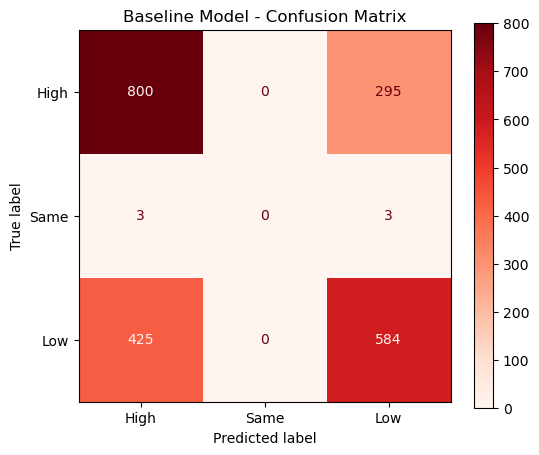

In [17]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High', 'Same', 'Low'])
disp.plot(ax=ax, cmap='Reds')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

In [18]:
rf_baseline.feature_importances_

array([0.05107103, 0.04724307, 0.04814587, 0.06449416, 0.07000503,
       0.00256515, 0.        , 0.        , 0.02311317, 0.01969086,
       0.07458472, 0.08121137, 0.0199571 , 0.00748647, 0.05276254,
       0.05052436, 0.05098415, 0.05001829, 0.0504128 , 0.05029753,
       0.05149964, 0.0504737 , 0.01948515, 0.01711199, 0.02162659,
       0.01499894, 0.01023632])

In [19]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Capital Gains', 'Year', 'Month', 'Day', 'Day_of_Year', 'Day_of_Week',
       'quarter', 'Close_lag1', 'Close_lag3', 'Close_lag5', 'Close_lag7',
       'Close_lag14', 'Close_lag21', 'Close_lag28', 'Close_lag365',
       'Month_Sin', 'Month_Cos', 'Dayofweek_Sin', 'Dayofweek_Cos',
       'Ticker_Code'],
      dtype='object')

In [20]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance

,feature,importance
0,Open,0.051071
1,High,0.047243
2,Low,0.048146
3,Close,0.064494
4,Volume,0.070005
5,Dividends,0.002565
6,Stock Splits,0.000000
7,Capital Gains,0.000000
8,Year,0.023113
9,Month,0.019691


In [21]:
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [22]:
feature_importance

,feature,importance
11,Day_of_Year,0.081211
10,Day,0.074585
4,Volume,0.070005
3,Close,0.064494
14,Close_lag1,0.052763
20,Close_lag28,0.051500
0,Open,0.051071
16,Close_lag5,0.050984
15,Close_lag3,0.050524
21,Close_lag365,0.050474


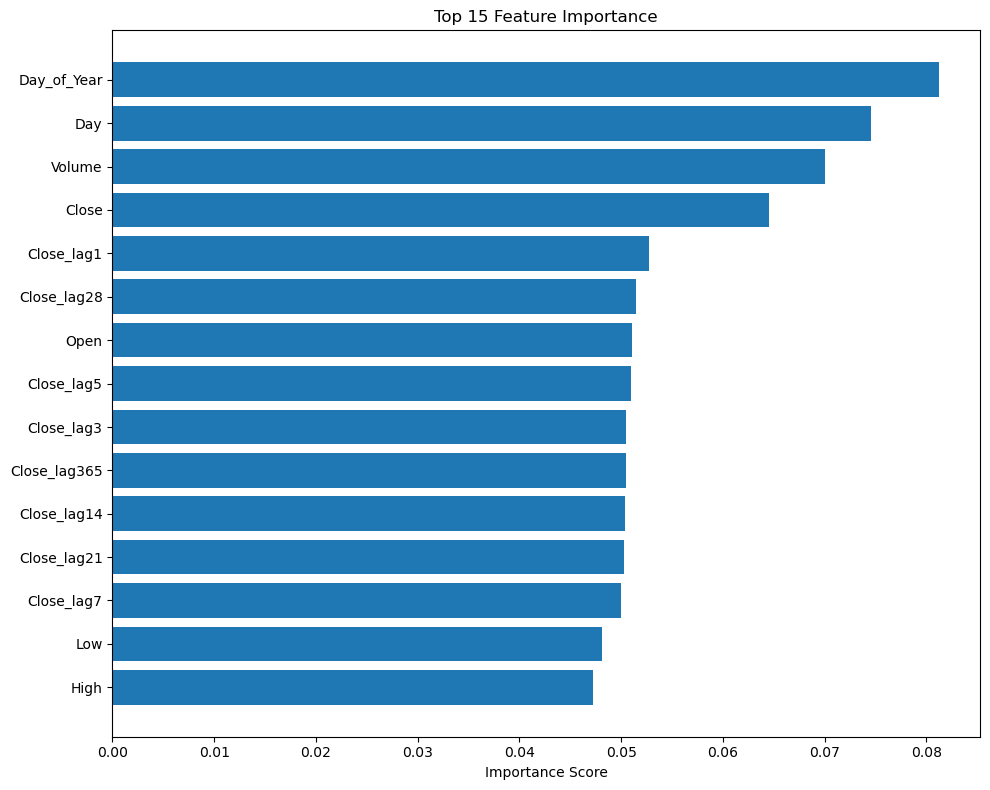

In [23]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [24]:
# Select top features
top_n = 10
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['Day_of_Year',
 'Day',
 'Volume',
 'Close',
 'Close_lag1',
 'Close_lag28',
 'Open',
 'Close_lag5',
 'Close_lag3',
 'Close_lag365']

In [25]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [26]:
accuracy_selected * 100

62.32227488151659

In [27]:
(accuracy_selected - accuracy) * 100

-3.2701421800947816

In [28]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [29]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [30]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 500}

In [31]:
grid_search.best_score_

np.float64(0.6238888405060161)

In [32]:
# Test the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [33]:
accuracy

0.6559241706161137

In [34]:
accuracy_selected

0.6232227488151659

In [35]:
accuracy_best

0.6327014218009479

In [36]:
(accuracy_best - accuracy)*100

-2.322274881516584

In [37]:
# Final classification report
print(classification_report(y_test, y_pred_best, target_names=['High', 'Same', 'Low']))

              precision    recall  f1-score   support

        High       0.63      0.71      0.67      1095
        Same       0.00      0.00      0.00         6
         Low       0.64      0.55      0.59      1009

    accuracy                           0.63      2110
   macro avg       0.42      0.42      0.42      2110
weighted avg       0.63      0.63      0.63      2110



c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tishs\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


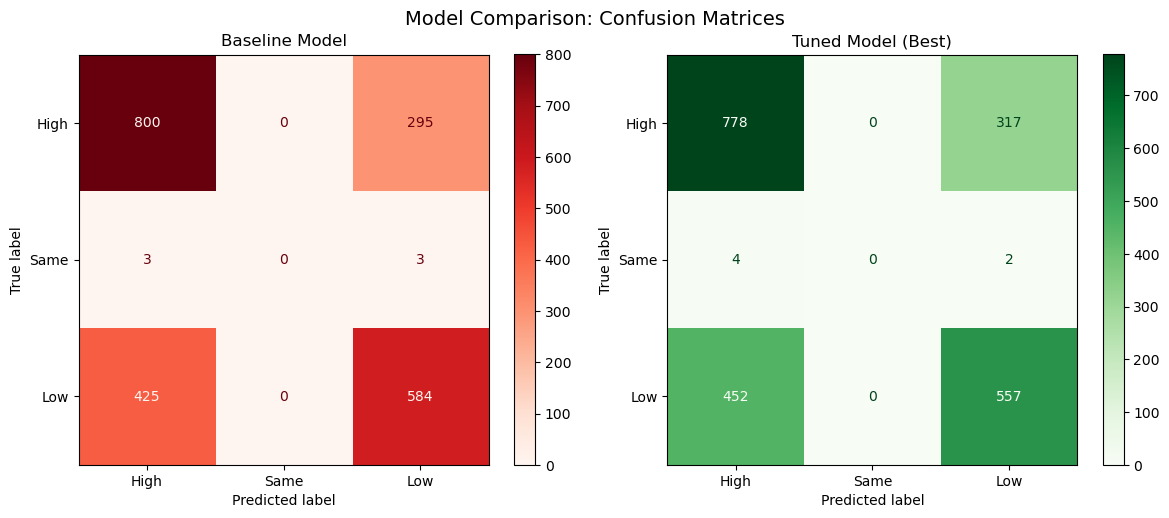

In [38]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['High', 'Same', 'Low'])
disp1.plot(ax=axes[0], cmap='Reds')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['High', 'Same', 'Low'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})

final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
3,Close,0.148130
0,Day_of_Year,0.117958
2,Volume,0.113388
6,Open,0.105416
4,Close_lag1,0.098939
8,Close_lag3,0.089672
5,Close_lag28,0.087445
7,Close_lag5,0.085404
1,Day,0.076918
9,Close_lag365,0.076731
